# Visualizing the tangent
This is from https://glowingpython.blogspot.kr/2013/02/visualizing-tangent.html

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

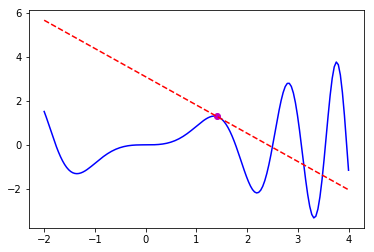

In [13]:
from numpy import sin, linspace, power

def f(x): # sample function
    return x*sin(power(x,2))

# evaluation of the function
x = linspace(-2, 4, 150)
y = f(x)

a = 1.4
h = 0.1
fprime = (f(a+h) - f(a))/h # derivative
tan = f(a) + fprime * (x-a) # tangent

# plot of the function and the tangent
plt.plot(x, y, 'b', a, f(a), 'om', x, tan, '--r');

In [17]:
from numpy import arange
# Fresh potatoes: Annual Consumer price index, 1949-2006
# obatined at https://explore.data.gov/Agriculture/U-S-Potato-Statistics/cgk7-6ccj
price_index = [21.0,17.6,19.3,28.9,21.1,20.5,22.1,26.4,22.3,24.4,24.6,28.0,24.7,24.9,25.7,31.6,39.1,31.3,31.3,32.1,34.4,38.0,36.7,39.6,58.8,71.8,57.7,62.6,63.8,66.3,63.6,81.0,109.5,92.7,91.3,116.0,101.5,96.1,116.0,119.1,153.5,162.6,144.6,141.5,154.6,174.3,174.7,180.6,174.1,185.2,193.1,196.3,202.3,238.6,228.1,231.1,247.7,273.1]
t = np.arange(1949,2007)

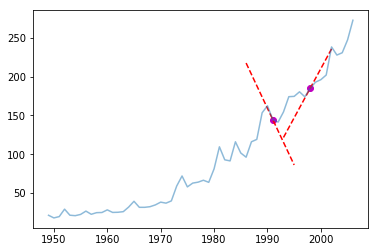

In [23]:
from scipy import interpolate

def draw_tangent(x, y, a):
    # interpolate the data with a spline
    spl = interpolate.splrep(x, y)
    small_t = arange(a - 5, a + 5)
    fa = interpolate.splev(a, spl, der=0) # f(a)
    fprime = interpolate.splev(a, spl, der=1) # f'(a)
    tan = fa + fprime * (small_t - a)
    plt.plot(a, fa, 'om', small_t, tan, '--r')
    
draw_tangent(t, price_index, 1991)
draw_tangent(t, price_index, 1998)

plt.plot(t, price_index, alpha=0.5);